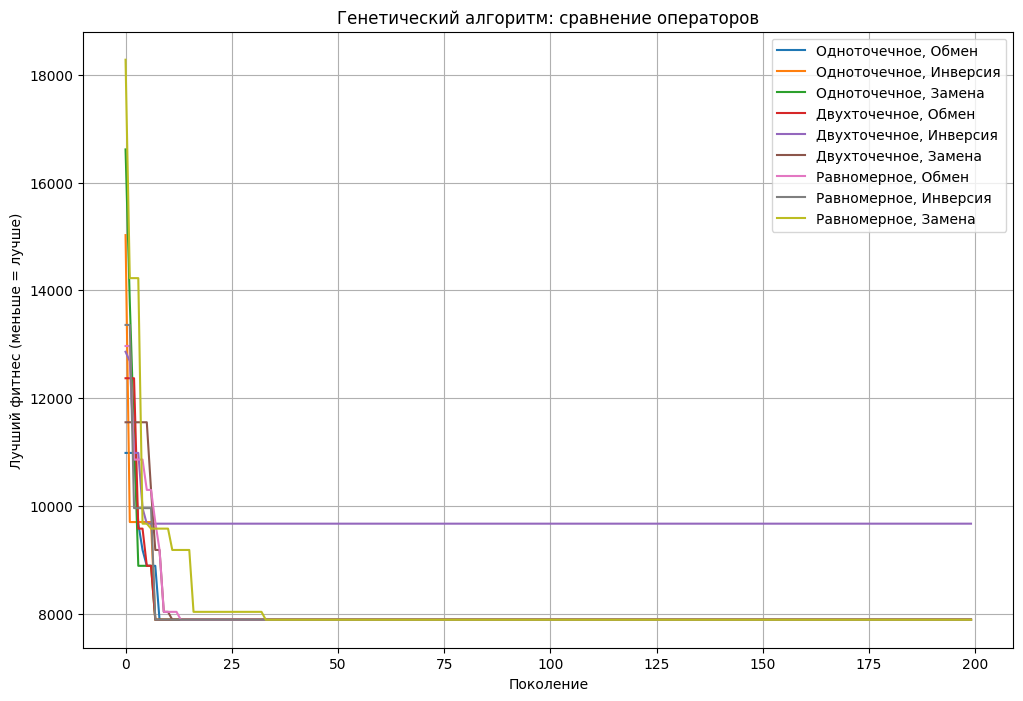

Лучшее решение (генетический алгоритм): ['Орехи', 'Овсянка', 'Банан', 'Хлеб цельнозерновой', 'Яблоко', 'Картофель', 'Рис', 'Сыр']
Фитнес: 7885.1299999999965
Стоимость: 555 руб.
Итого (калории, белки, жиры, углеводы):
2000 ккал, 81.19999999999999 белка, 98.99999999999999 жиров, 216.3 углеводов.

Лучшее решение (полный перебор): ['Яблоко', 'Банан', 'Рис', 'Сыр', 'Овсянка', 'Картофель', 'Хлеб цельнозерновой', 'Орехи']
Фитнес: 7885.129999999997
Стоимость: 555 руб.
Итого (калории, белки, жиры, углеводы):
2000 ккал, 81.2 белка, 99.0 жиров, 216.3 углеводов.


In [2]:
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt


products = [
    {"name": "Яблоко", "calories": 52, "protein": 0.3, "fat": 0.2, "carbs": 14, "price": 20},
    {"name": "Банан", "calories": 96, "protein": 1.3, "fat": 0.3, "carbs": 27, "price": 25},
    {"name": "Курица", "calories": 165, "protein": 31, "fat": 3.6, "carbs": 0, "price": 150},
    {"name": "Рис", "calories": 130, "protein": 2.7, "fat": 0.3, "carbs": 28, "price": 40},
    {"name": "Молоко", "calories": 42, "protein": 3.4, "fat": 1, "carbs": 5, "price": 30},
    {"name": "Сыр", "calories": 402, "protein": 25, "fat": 33, "carbs": 1.3, "price": 200},
    {"name": "Овсянка", "calories": 389, "protein": 16.9, "fat": 6.9, "carbs": 66, "price": 80},
    {"name": "Картофель", "calories": 77, "protein": 2, "fat": 0.1, "carbs": 17, "price": 15},
    {"name": "Говядина", "calories": 250, "protein": 26, "fat": 15, "carbs": 0, "price": 220},
    {"name": "Рыба", "calories": 206, "protein": 22, "fat": 12, "carbs": 0, "price": 180},
    {"name": "Яйцо", "calories": 155, "protein": 13, "fat": 11, "carbs": 1.1, "price": 12},
    {"name": "Фасоль", "calories": 127, "protein": 9, "fat": 0.5, "carbs": 23, "price": 30},
    {"name": "Хлеб цельнозерновой", "calories": 247, "protein": 13, "fat": 4.2, "carbs": 41, "price": 25},
    {"name": "Орехи", "calories": 607, "protein": 20, "fat": 54, "carbs": 22, "price": 150},
    {"name": "Авокадо", "calories": 160, "protein": 2, "fat": 15, "carbs": 9, "price": 70},
    {"name": "Творог", "calories": 98, "protein": 11, "fat": 4.3, "carbs": 3.4, "price": 60},
]

N = len(products)           
K = 8                       
budget = 800               

norms = {
    "calories": 2000,
    "protein": 75,
    "fat": 70,
    "carbs": 300,
}


def fix_individual(ind):
    ind = list(dict.fromkeys(ind))
    while len(ind) < K:
        gene = random.choice(range(N))
        if gene not in ind:
            ind.append(gene)
    return ind[:K]


def fitness(solution):
    chosen = [products[i] for i in solution]
    total_price = sum(p["price"] for p in chosen)

    if total_price > budget:
        return float("inf")

    totals = {
        "calories": sum(p["calories"] for p in chosen),
        "protein": sum(p["protein"] for p in chosen),
        "fat": sum(p["fat"] for p in chosen),
        "carbs": sum(p["carbs"] for p in chosen),
    }

    deviation = sum((totals[key] - norms[key]) ** 2 for key in norms)
    return deviation


def brute_force():
    best_solution = None
    best_fitness = float("inf")
    for combo in itertools.combinations(range(N), K):
        f = fitness(combo)
        if f < best_fitness:
            best_fitness = f
            best_solution = combo
    return best_solution, best_fitness


population_size = 200
generations = 200

def initialize_population():
    return [random.sample(range(N), K) for _ in range(population_size)]

def selection(population):
    scored = sorted(population, key=lambda ind: fitness(ind))
    return scored[: population_size // 2]


def single_point_crossover(p1, p2):
    point = random.randint(1, K - 1)
    child1 = p1[:point] + [g for g in p2 if g not in p1[:point]]
    child2 = p2[:point] + [g for g in p1 if g not in p2[:point]]
    return fix_individual(child1), fix_individual(child2)

def two_point_crossover(p1, p2):
    a, b = sorted(random.sample(range(1, K), 2))
    child1 = p1[:a] + p2[a:b] + [g for g in p1 if g not in p2[a:b]]
    child2 = p2[:a] + p1[a:b] + [g for g in p2 if g not in p1[a:b]]
    return fix_individual(child1), fix_individual(child2)

def uniform_crossover(p1, p2):
    child1, child2 = [], []
    for i in range(K):
        if random.random() < 0.5:
            child1.append(p1[i])
            child2.append(p2[i])
        else:
            child1.append(p2[i])
            child2.append(p1[i])
    return fix_individual(child1), fix_individual(child2)


def swap_mutation(ind):
    ind = ind.copy()
    a, b = random.sample(range(K), 2)
    ind[a], ind[b] = ind[b], ind[a]
    return fix_individual(ind)

def inversion_mutation(ind):
    ind = ind.copy()
    a, b = sorted(random.sample(range(K), 2))
    ind[a:b] = reversed(ind[a:b])
    return fix_individual(ind)

def replacement_mutation(ind):
    ind = ind.copy()
    pos = random.randint(0, K - 1)
    new_gene = random.choice([i for i in range(N) if i not in ind])
    ind[pos] = new_gene
    return fix_individual(ind)


def genetic_algorithm(crossover, mutation):
    population = initialize_population()
    history = []

    for _ in range(generations):
        selected = selection(population)
        next_population = selected.copy()

        while len(next_population) < population_size:
            p1, p2 = random.sample(selected, 2)
            c1, c2 = crossover(p1, p2)
            next_population.append(mutation(c1))
            next_population.append(mutation(c2))

        population = [fix_individual(ind) for ind in next_population]
        best = min(population, key=fitness)
        history.append(fitness(best))

    return best, history


crossover_methods = {
    "Одноточечное": single_point_crossover,
    "Двухточечное": two_point_crossover,
    "Равномерное": uniform_crossover,
}

mutation_methods = {
    "Обмен": swap_mutation,
    "Инверсия": inversion_mutation,
    "Замена": replacement_mutation,
}

plt.figure(figsize=(12, 8))

best_overall_ga = None
best_overall_history = None

for cname, cfunc in crossover_methods.items():
    for mname, mfunc in mutation_methods.items():
        best, hist = genetic_algorithm(cfunc, mfunc)
        plt.plot(hist, label=f"{cname}, {mname}")
        # сохраняем лучшее решение среди всех запусков GA
        if best_overall_ga is None or fitness(best) < fitness(best_overall_ga):
            best_overall_ga = best
            best_overall_history = hist

plt.title("Генетический алгоритм: сравнение операторов")
plt.xlabel("Поколение")
plt.ylabel("Лучший фитнес (меньше = лучше)")
plt.legend()
plt.grid()
plt.show()


# -----------------------------
# Вывод лучших результатов
# -----------------------------
# Генетический алгоритм
best_ga_products = [products[i]["name"] for i in best_overall_ga]
print("Лучшее решение (генетический алгоритм):", best_ga_products)
print("Фитнес:", fitness(best_overall_ga))
print("Стоимость:", sum(products[i]["price"] for i in best_overall_ga), "руб.")
print("Итого (калории, белки, жиры, углеводы):")
print(sum(products[i]["calories"] for i in best_overall_ga), "ккал,", 
      sum(products[i]["protein"] for i in best_overall_ga), "белка,", 
      sum(products[i]["fat"] for i in best_overall_ga), "жиров,", 
      sum(products[i]["carbs"] for i in best_overall_ga), "углеводов.")

# Полный перебор
brute_solution, brute_fit = brute_force()
best_products = [products[i]["name"] for i in brute_solution]
print("\nЛучшее решение (полный перебор):", best_products)
print("Фитнес:", brute_fit)
print("Стоимость:", sum(products[i]["price"] for i in brute_solution), "руб.")
print("Итого (калории, белки, жиры, углеводы):")
print(sum(products[i]["calories"] for i in brute_solution), "ккал,", 
      sum(products[i]["protein"] for i in brute_solution), "белка,", 
      sum(products[i]["fat"] for i in brute_solution), "жиров,", 
      sum(products[i]["carbs"] for i in brute_solution), "углеводов.")
